In [ ]:
# Imports
# Cite Lesson 804 - Convolutional Neural Nets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

#Model Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

# Image Pre-processing and Augmentation
from tensorflow.keras.layers import Resizing, Rescaling, CenterCrop
from tensorflow.keras.layers import RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, RandomContrast

#Access Image files from Google Drive
import os
from PIL import Image
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Create X, y data from google drive folders
X_train = []
y_train = []

for photo in os.listdir('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/train/hotdog/'):
    if photo.endswith(".jpg"):
        image_path = os.path.join('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/train/hotdog/', photo)
        image = Image.open(image_path)
        image = image.resize((300, 300))
        image = np.array(image)
        X_train.append(image)
        y_train.append(1)

for photo in os.listdir('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/train/nothotdog/'):
    if photo.endswith(".jpg"):
        image_path = os.path.join('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/train/nothotdog/', photo)
        image = Image.open(image_path)
        image = image.resize((300, 300))
        image = np.array(image)
        X_train.append(image)
        y_train.append(0)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []

#building X and y from both hotdog and nothotdog folders
for photo in os.listdir('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/test/hotdog/'):
    if photo.endswith(".jpg"):
        image_path = os.path.join('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/test/hotdog/', photo)
        image = Image.open(image_path)
        image = image.resize((300, 300))
        image = np.array(image)
        X_test.append(image)
        y_test.append(1)

for photo in os.listdir('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/test/nothotdog/'):
    if photo.endswith(".jpg"):
        image_path = os.path.join('/content/drive/MyDrive/group_project_data/Hack-a-thon/hotdog-nothotdog/test/nothotdog/', photo)
        image = Image.open(image_path)
        image = image.resize((300, 300))
        image = np.array(image)
        X_test.append(image)
        y_test.append(0)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Keras Preprocessing
img_size = (300, 300)
#resize all images to 300x3-- and scale images from 255 scale to 0-1 scale
resize_and_rescale = Sequential([
   Resizing(img_size, img_size),
   Rescaling(1.0 / 255)
])

#Optional data augmentation layer to randomly flip, rotate and zoom.
data_augmentation = Sequential(
   [
        RandomFlip(mode='horizontal_and_vertical', seed = 42),
        RandomRotation(0.2),
        RandomZoom(0.1)
    ]
)

# 4 Layers with 16, 32, 63 Convolutional nodes.  Dropouts interspersed
model = Sequential([
    Rescaling(1./255, input_shape=(300, 300, 3)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.1),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.3),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer ='adam',
              loss='bce',
              metrics=['acc'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=10
)

Epoch 1/10
24/24 [==============================] - 13s 297ms/step - loss: 2.7293 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
24/24 [==============================] - 7s 274ms/step - loss: 0.6820 - acc: 0.6017 - val_loss: 0.6773 - val_acc: 0.6009
Epoch 3/10
24/24 [==============================] - 7s 272ms/step - loss: 0.6380 - acc: 0.6500 - val_loss: 0.6504 - val_acc: 0.6460
Epoch 4/10
24/24 [==============================] - 7s 283ms/step - loss: 0.5989 - acc: 0.6873 - val_loss: 0.6116 - val_acc: 0.6801
Epoch 5/10
24/24 [==============================] - 7s 279ms/step - loss: 0.5795 - acc: 0.6883 - val_loss: 0.6215 - val_acc: 0.6599
Epoch 6/10
24/24 [==============================] - 7s 283ms/step - loss: 0.5735 - acc: 0.6960 - val_loss: 0.5902 - val_acc: 0.7003
Epoch 7/10
24/24 [==============================] - 7s 277ms/step - loss: 0.5537 - acc: 0.7210 - val_loss: 0.5791 - val_acc: 0.7158
Epoch 8/10
24/24 [==============================] - 7s 286ms/step - loss: 0

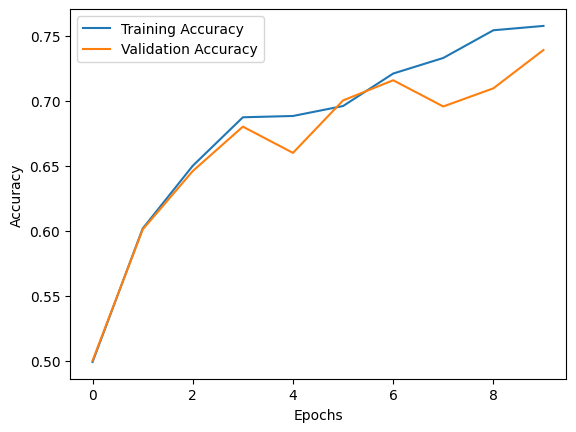

In [ ]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/group_project_data/Hack-a-thon/')

In [ ]:
#Write the pickled value to disk
with open('./model.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(model, pickle_out)

In [ ]:
#Open the pickled value
with open('./model.pkl', 'rb') as pickle_in:
    model = pickle.load(pickle_in)

model